In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state=666)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state=888)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [22]:
# 创建模型子类的API，自定义模型
class WideDeepModel(keras.models.Model):
    def __init__(self):
        """模型的初始化"""
        # 初始化所继承的父类
        super(WideDeepModel, self).__init__()
        
        # 定义模型中的各层神经元数，激活函数
        # 隐藏层
        self.hidden1_layer = keras.layers.Dense(30, activation='relu')
        self.hidden2_layer = keras.layers.Dense(30, activation='relu')
        # 输出层
        self.output_layer = keras.layers.Dense(1)
    
    def call(self, m_input):
        """模型的正向计算"""
        # 隐藏层
        hidden1 = self.hidden1_layer(m_input)
        hidden2 = self.hidden2_layer(hidden1)
        
        # 输出层
        # 将输出层和隐藏层数据连接，创建输出层
        concat = keras.layers.concatenate([m_input, hidden2])
        output = self.output_layer(concat)
        
        return output

# 将自定义的模型传给Sequential初始化一个模型
model = keras.models.Sequential([
    WideDeepModel(),
])

# 指定输入层数据的形状，构建模型
model.build(input_shape=(None, 8))  # 指定8维的列向量

model.summary()

# 编译模型，指定损失函数、优化器
model.compile(loss="mean_squared_error",
              optimizer = keras.optimizers.SGD(0.001))

# 指定回调函数
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-3)]

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
wide_deep_model_7 (WideDeepM multiple                  1239      
Total params: 1,239
Trainable params: 1,239
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 100,
                    callbacks = callbacks)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 2.6711 - val_loss: 0.7514
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.7239 - val_loss: 0.6480
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6524 - val_loss: 0.6135
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6186 - val_loss: 0.5851
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5895 - val_loss: 0.5604
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5674 - val_loss: 0.5432
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5500 - val_loss: 0.5291
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5355 - val_loss: 0.5154
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5235 - val_loss: 0.5047
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5120 - val_lo

363/363 [==============================] - 1s 1ms/step - loss: 0.3701 - val_loss: 0.3532
Epoch 82/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3691 - val_loss: 0.3517
Epoch 83/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3687 - val_loss: 0.3523
Epoch 84/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3685 - val_loss: 0.3511
Epoch 85/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3679 - val_loss: 0.3514
Epoch 86/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3676 - val_loss: 0.3498
Epoch 87/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3667 - val_loss: 0.3504
Epoch 88/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3660 - val_loss: 0.3510
Epoch 89/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3658 - val_loss: 0.3495
Epoch 90/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3660 - val_loss: 

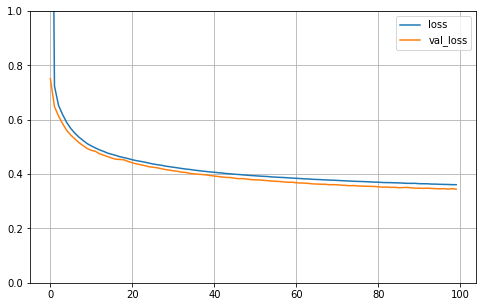

In [27]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [26]:
model.evaluate(x_test_scaled, y_test, verbose=0)

0.3713501989841461